In [8]:
library(ggplot2)
library(tidyr)
library(tidyverse)
library(dcldata)

In [3]:
df = read.csv('../data/cytof_one_experiment.csv')

In [5]:
head(df, n = 10)

,NKp30,KIR3DL1,NKp44,KIR2DL1,GranzymeB,CXCR6,CD161,KIR2DS4,NKp46,NKG2D,⋯,CD16,TNFa,ILT2,Perforin,KIR2DL2.L3.S2,KIR2DL3,NKG2A,NTB.A,CD56,INFg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1875955,3.61569324,-0.5605694,-0.2936654,2.4778929,-0.14470053,-0.3152872,1.94497046,4.0818316,2.62007840,⋯,3.9951417,0.90143498,-0.386027758,6.431983,1.22710292,2.660657999,-0.5220613,4.348923,2.897523,-0.38411079
2,1.0348518,1.70018202,-0.2889611,-0.4798280,3.2610161,-0.03392447,-0.4112129,3.80251714,3.7339299,-0.48327879,⋯,4.4082309,1.93590153,2.983874845,6.814827,-0.04141081,3.841304627,4.6771149,3.474335,3.782870,2.71862957
3,2.9996398,6.14114186,1.9032606,0.4823102,4.2775617,1.94654156,-0.5022347,-0.32010171,4.5594631,-0.50690897,⋯,6.0023244,-0.02336999,-0.521099944,5.099562,-0.16705075,-0.009694396,-0.4730573,5.634341,5.701186,2.53217632
4,4.2998594,-0.22115860,0.2425707,-0.4831267,3.3518081,0.92622195,3.8772370,-0.16969487,4.4831486,1.92722902,⋯,5.8238698,-0.60793749,-0.043783559,5.841797,-0.51753289,-0.592990887,-0.4059049,4.598021,6.065672,2.45645823
5,-0.4386448,-0.50358920,-0.1526320,0.7506128,3.1941453,-0.05893640,1.0907379,-0.05033025,0.8379358,-0.45816738,⋯,4.0122501,-0.61989100,1.182703288,4.888777,-0.36251589,-0.398123704,-0.5440881,3.606101,1.966169,3.14700918
6,2.0883050,-0.39926459,3.4550676,-0.5200856,4.3451025,-0.36434277,-0.5705891,-0.45033591,4.0550848,3.42835646,⋯,-0.5832926,0.14311030,-0.003258955,3.952542,-0.20194392,-0.202592720,3.8882776,2.346275,6.473243,2.82829866
7,-0.6132596,-0.11663800,-0.4512110,3.5458515,1.5430597,-0.41351724,0.7254911,-0.06735959,2.6651401,-0.08376734,⋯,3.3323524,-0.44847160,-0.151396256,6.247289,-0.48058961,-0.317244773,3.0763917,3.898727,3.660979,0.53842782
8,-0.3413893,-0.25341245,-0.4592173,2.8992714,-0.5451933,-0.61175860,-0.1279548,2.79152591,0.7255918,2.09556916,⋯,2.7832278,-0.08849160,2.612436055,5.617442,-0.07145452,2.439626933,-0.2024779,3.324831,3.499159,-0.03111381
9,2.3116562,-0.36403357,-0.5727807,3.8352221,2.9209070,2.45722962,2.2479263,-0.37610392,4.3333043,-0.01676545,⋯,5.1664385,1.77936191,-0.038896047,6.832474,3.58195551,0.652217458,2.2786631,5.306381,5.470519,-0.19172223


In [6]:
expanded = df %>% pivot_longer(cols = everything(),
                            names_to = "Protein",
                            values_to = "Value",
                            )

In [7]:
head(expanded, n=10)

Protein,Value
<chr>,<dbl>
NKp30,0.1875955
KIR3DL1,3.6156932
NKp44,-0.5605694
KIR2DL1,-0.2936654
GranzymeB,2.4778929
CXCR6,-0.1447005
CD161,-0.3152872
KIR2DS4,1.9449705
NKp46,4.0818316


In [44]:
median_values = expanded %>% group_by(Protein) %>% summarise(median_protein = median(Value))


In [45]:
mad_values = expanded %>% group_by(Protein) %>% summarise(mad_protein = mad(Value))

In [46]:
spread_location <- left_join(median_values, mad_values, by = "Protein" )

In [53]:
spread_location

Protein,median_protein,mad_protein
<chr>,<dbl>,<dbl>
CD107a,-0.122299723,0.6086976
CD16,5.122980165,0.8744054
CD161,0.725693301,1.6882296
CD2,3.945378908,1.6770427
CD4,-0.203649896,0.3953896
CD56,5.710790329,0.9981358
CD57,3.070920414,1.9868804
CD69,4.588542784,1.0186438
CD8,2.400718137,2.2887240


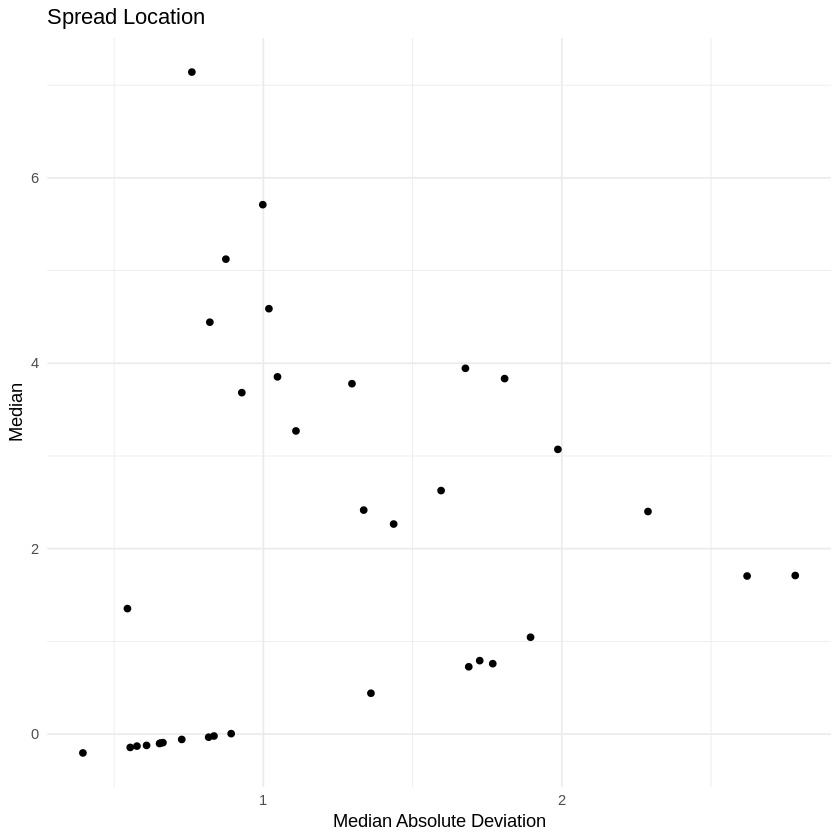

In [54]:
ggplot(spread_location, aes(x = mad_protein, y = median_protein)) +
  geom_point() +
  labs(x = "Median Absolute Deviation", y = "Median", title = "Spread Location") +
  theme_minimal()

This graph gives us the intuition that the the spread location plot has no strong relationship, and therefore we can make an assumption that this data is homoescedastic 

In [14]:
data(example_gymnastics_2)

In [15]:
dcl <- example_gymnastics_2

In [16]:
dcl

country,vault_2012,floor_2012,vault_2016,floor_2016
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
United States,48.132,45.366,46.866,45.999
Russia,46.366,41.599,45.733,42.032
China,44.266,40.833,44.332,42.066


In [ ]:
reshaped <- dcl %>% 
                pivot_longer(
                    cols = -country,
                    names_to = c("event", "year"),
                    names_sep = '_'
                ) %>% 
                rename(score = value)

In [31]:
reshaped

country,event,year,score
<chr>,<chr>,<chr>,<dbl>
United States,vault,2012,48.132
United States,floor,2012,45.366
United States,vault,2016,46.866
United States,floor,2016,45.999
Russia,vault,2012,46.366
Russia,floor,2012,41.599
Russia,vault,2016,45.733
Russia,floor,2016,42.032
China,vault,2012,44.266
